In [1]:
import pandas as pd
#pd.set_option("display.max_rows", None, 'display.max_columns', None)

In [2]:
RawData = pd.read_csv("recommendation data.csv", encoding = "latin", low_memory=False)
RawData.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [3]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [4]:
RawData.isnull().sum().sort_values()

Customers.id                0
Order_Items.id              0
Orders.subtotal             0
Orders.currency             0
Orders.order_number         0
                         ... 
Customers.rewards        4194
Products.websites        4194
Products.audio           4194
Products.seo_footer      4194
Products.freight_cost    4194
Length: 181, dtype: int64

## Data Cleaning

In [5]:
def DropDuplicatesAndEmpties(DataFrame):
    return DataFrame.drop([column for column in DataFrame.columns.to_list() if (DataFrame[column].count() == 0)], axis = 1).drop_duplicates()

In [6]:
# Removing outliers from a DataFrame
def OutliersRemoved(DataFrame, ColumnLabel, Sigma = 3):
    DataFrame = DataFrame[(DataFrame[ColumnLabel] < (DataFrame[ColumnLabel].mean() + (Sigma * DataFrame[ColumnLabel].std()))) & (DataFrame[ColumnLabel] > (DataFrame[ColumnLabel].mean() - (Sigma * DataFrame[ColumnLabel].std())))]
    return DataFrame

In [7]:
def ShowSimpleHist(Data_List, Width = 10, Height = 5):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.close()
    axes = plt.figure(figsize=(Width, Height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    plt.hist(Data_List)
    plt.show()

In [8]:
FilteredData = RawData[[columnLabel for columnLabel in RawData.columns.to_list() if (columnLabel.startswith("Customers") | (columnLabel.startswith("Products")))]]

In [9]:
FilteredData = DropDuplicatesAndEmpties(FilteredData)

In [10]:
FilteredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 4193
Data columns (total 95 columns):
Customers.id                      3730 non-null int64
Customers.fname                   3730 non-null object
Customers.lname                   3730 non-null object
Customers.company                 628 non-null object
Customers.create_date             3730 non-null int64
Customers.status                  75 non-null float64
Customers.mailing                 1861 non-null float64
Customers.tax_exempt              5 non-null float64
Customers.account_id              3 non-null float64
Customers.last_modified           3730 non-null int64
Customers.customer_type           3320 non-null float64
Products.id                       3613 non-null float64
Products.status                   3613 non-null float64
Products.template                 3550 non-null object
Products.vendor                   3613 non-null float64
Products.import_id                3613 non-null float64
Products.name   

In [11]:
def DisplayDataFramesSideBySide(*Arguments):
    from IPython.display import display_html
    import pandas as pd
    import numpy as np
    
    html_str=''
    for item in Arguments:
        if(type(item) in [np.ndarray, list]):
            item = pd.DataFrame(item)
        html_str+=item.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [12]:
DisplayDataFramesSideBySide(pd.DataFrame(FilteredData.isnull().sum(), columns = ["Nulls"]),
                            pd.DataFrame(FilteredData.dropna(axis = 1, thresh = int(len(FilteredData) * 0.9)).isnull().sum().sort_values(), columns = ["Nulls < 10%"]))

,Nulls
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3102
Customers.create_date,0
Customers.status,3655
Customers.mailing,1869
Customers.tax_exempt,3725
Customers.account_id,3727
Customers.last_modified,0


In [13]:
# TrimmedData = FilteredData.dropna(axis = 1, thresh = int(len(FilteredData) * 0.95)).dropna(axis = 0)
# TrimmedData.info()

In [14]:
# display(TrimmedData["Products.id"].unique())
# display([len(TrimmedData["Products.id"].unique())])

### Create matrix showing which products each customer id purchased

In [15]:
import pandas as pd
import numpy as np

pd.pivot_table(FilteredData, values = ["Products.id"], index = ["Customers.id"], aggfunc = {"Products.id" : pd.Series.count}).sort_values(by = "Products.id")
pd.pivot_table(FilteredData, values = ["Products.id"], index = ["Customers.id"], aggfunc = {"Products.id" : pd.Series.count}).sort_values(by = "Products.id")

,Products.id
Customers.id,
1743,0.0
1455,0.0
2013,0.0
2018,0.0
1424,0.0
...,...
45,9.0
851,9.0
3399,10.0


#### Use Vectorizer to count instances of product id per customer

In [16]:
MatrixSourceData = FilteredData[["Customers.id", "Products.id"]]

In [17]:
MatrixSourceData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 4193
Data columns (total 2 columns):
Customers.id    3730 non-null int64
Products.id     3613 non-null float64
dtypes: float64(1), int64(1)
memory usage: 87.4 KB


In [18]:
display(MatrixSourceData["Customers.id"].unique())
display(len(MatrixSourceData["Customers.id"].unique()))

array([ 797,    3,    4, ..., 3733, 3735, 3736], dtype=int64)

3054

In [19]:
MatrixSourceData.loc[:, "Products.id"] = MatrixSourceData["Products.id"].fillna(-1).astype("int").astype("str")
MatrixSourceData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 4193
Data columns (total 2 columns):
Customers.id    3730 non-null int64
Products.id     3730 non-null object
dtypes: int64(1), object(1)
memory usage: 87.4+ KB


C:\Programs\Anaconda3\envs\BigData\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

Vectorizer = CountVectorizer()

ProductCountMatrix = Vectorizer.fit_transform(MatrixSourceData["Products.id"].to_list())

In [21]:
ProductCountMatrix

<3730x1709 sparse matrix of type '<class 'numpy.int64'>'
	with 3612 stored elements in Compressed Sparse Row format>

In [22]:
Transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
Transformer.fit(ProductCountMatrix)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [23]:
pd.DataFrame([Transformer.idf_], columns = Vectorizer.get_feature_names())

,100,1000,1001,1002,1003,1004,1005,1006,1008,1009,...,984,985,986,991,993,994,996,997,9977,998
0,7.432672,8.531284,8.531284,8.531284,7.027207,8.125819,8.125819,8.531284,7.278521,7.278521,...,7.14499,8.531284,7.432672,8.531284,6.451843,8.125819,8.531284,7.027207,8.531284,7.838137


In [24]:
pd.DataFrame.sparse.from_spmatrix(ProductCountMatrix)

,0,1,2,3,4,5,6,7,8,9,...,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
#[Transformer.fit(rowData) for rowIndex, rowData in pd.DataFrame.sparse.from_spmatrix(ProductCountMatrix).iterrows()]

For each product id (column) isolate row subset of customer id's with quantity > 0 then calculate frequency of the other product id's in the row subset
Recommend based on higher frequencies of the other product id's that occur in that row subset

#### Use dummy matrix to show which products each customer id purchased

In [26]:
MatrixSourceData = FilteredData[["Customers.id", "Products.id"]]
MatrixSourceData.loc[:, "Products.id"] = MatrixSourceData["Products.id"].fillna(-1).astype("int").astype("str")

C:\Programs\Anaconda3\envs\BigData\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
MatrixData = pd.get_dummies(MatrixSourceData, drop_first = False)

In [28]:
MatrixData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 4193
Columns: 1712 entries, Customers.id to Products.id_998
dtypes: int64(1), uint8(1711)
memory usage: 6.1 MB


In [29]:
MatrixData.groupby("Customers.id").sum()

,Products.id_-1,Products.id_1,Products.id_100,Products.id_1000,Products.id_1001,Products.id_1002,Products.id_1003,Products.id_1004,Products.id_1005,Products.id_1006,...,Products.id_984,Products.id_985,Products.id_986,Products.id_991,Products.id_993,Products.id_994,Products.id_996,Products.id_997,Products.id_9977,Products.id_998
Customers.id,,,,,,,,,,,,,,,,,,,,,
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
MatrixData.groupby("Customers.id").sum().max().sort_values()

Products.id_-1       1
Products.id_3259     1
Products.id_3258     1
Products.id_3255     1
Products.id_3253     1
                    ..
Products.id_16561    1
Products.id_1656     1
Products.id_16558    1
Products.id_16531    1
Products.id_998      1
Length: 1711, dtype: uint8

In [31]:
ConsolidatedMatrixData = MatrixData.groupby("Customers.id").sum().reset_index()
ConsolidatedMatrixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Columns: 1712 entries, Customers.id to Products.id_998
dtypes: int64(1), uint8(1711)
memory usage: 5.0 MB


In [32]:
display(ConsolidatedMatrixData["Customers.id"].unique())
display(len(ConsolidatedMatrixData["Customers.id"].unique()))

array([   3,    4,    5, ..., 3733, 3735, 3736], dtype=int64)

3054

In [33]:
# Number of times each product has been purchased
ConsolidatedMatrixData.describe().loc["max", :].sort_values()

Products.id_21920       1.0
Products.id_3259        1.0
Products.id_3258        1.0
Products.id_3255        1.0
Products.id_3253        1.0
                      ...  
Products.id_1656        1.0
Products.id_16558       1.0
Products.id_16547       1.0
Products.id_1653        1.0
Customers.id         3736.0
Name: max, Length: 1712, dtype: float64

In [34]:
# Count of how many products each customer has ever purchased
ConsolidatedMatrixData.drop("Customers.id", axis = 1).sum(axis = 1).sort_values()

3053     1
1781     1
1782     1
1783     1
1784     1
        ..
30       9
1402     9
2764    10
1363    11
1276    14
Length: 3054, dtype: int64

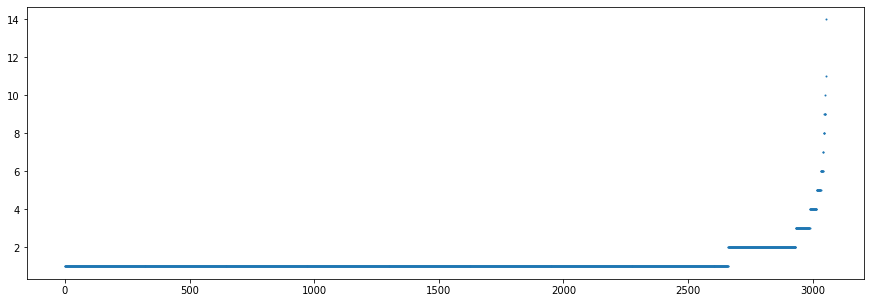

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.close()
axes = plt.figure(figsize = (15, 5)).add_subplot(111)
plt.scatter(range(3054), ConsolidatedMatrixData.drop("Customers.id", axis = 1).sum(axis = 1).sort_values(), s = 1)
plt.show()

In [36]:
ConsolidatedMatrixData["ProductsPurchased"] = ConsolidatedMatrixData.drop("Customers.id", axis = 1).sum(axis = 1)

In [37]:
ConsolidatedMatrixData.loc[ConsolidatedMatrixData["ProductsPurchased"] > 1, "ProductsPurchased"].sort_values()

0        2
1889     2
1883     2
1868     2
1841     2
        ..
1402     9
672      9
2764    10
1363    11
1276    14
Name: ProductsPurchased, Length: 393, dtype: int64

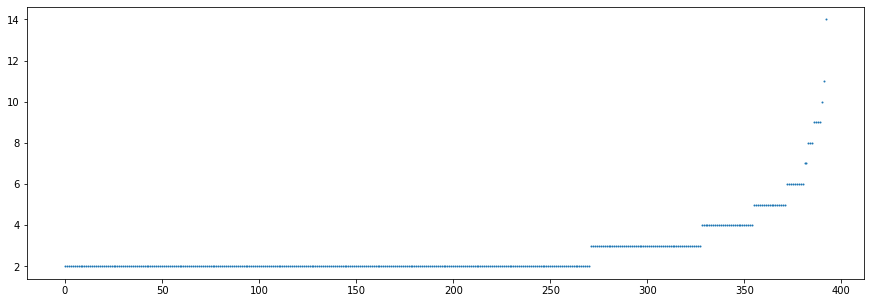

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.close()
axes = plt.figure(figsize = (15, 5)).add_subplot(111)
plt.scatter(range(393), ConsolidatedMatrixData.loc[ConsolidatedMatrixData["ProductsPurchased"] > 1, "ProductsPurchased"].sort_values(), s = 1)
plt.show()

#### Locate Products purchased by other customers that also purchased each item in each customer's purchase history

In [39]:
def GenerateSimilarSalesMatrix(SalesData):
    
    otherProductsMatrix = pd.DataFrame()
    
    for index, rowData in SalesData.iterrows():
        newRowData = pd.DataFrame()
        newRowData["Customers.id"] = rowData["Customers.id"]
        
        otherProductsMatrix.append(newRowData, ignore_index = True)
        